In [28]:
function returnValue = arithmeticMean(v) #BEGINN AUFGABE 19, A)
    returnValue = 0;
    for i = [1:length(v)]
        returnValue = returnValue + v(i);
    endfor
    returnValue = returnValue/length(v);
    return
endfunction

In [7]:
#Beispielfunktion:
#function retval = any_nonzero (v)
#  retval = 0;
#  for i = 1:length (v)
#    if (v (i) != 0)
#      retval = 1;
#      return;
#    endif
#  endfor
#  printf ("no nonzero elements found\n");
#endfunction

In [360]:
function returnValue = randomVector(n, l, u) #length, mean (arithmetisches Mittel), deviation (die wurzel aus der Varianz)
    returnValue = [1:n];
    for i =[1:n];
        returnValue(i) = normrnd(l,u);
    endfor
    return;
endfunction

In [185]:
v = randomVector(20000, 5, 20); #Wir sehen: für n gegen 10000 konvergieren die Varianzen sehr schnell gegen deviation^2

In [359]:
function returnValue = variance1(v) #Varianz 1
    returnValue = 0;
    arithmeticMean = arithmeticMean(v);
    for i = [1:length(v)]
        returnValue = returnValue + (v(i) - arithmeticMean)^2;
    endfor
    returnValue = returnValue/length(v);
    return
endfunction
    

In [187]:
variance1(v)

ans =  400.76


In [358]:
function returnValue = variance2(v) #Varianz 2
    returnValue = 0;
    left = 0;
    right  = 0;
    for i = [1:length(v)]
        left += v(i)^2;
        right += v(i);
    endfor
    left /= length(v);
    right = (right/length(v))^2;
    returnValue = left - right;
    return
endfunction

In [188]:
variance2(v)

ans =  400.76


In [193]:
printf('%.40f\n',variance1(v)) #Zeig die Nachkommastellen

400.7638195768479931757610756903886795043945


In [192]:
printf('%.40f\n', variance2(v))

400.7638195768487321402062661945819854736328


In [342]:
printf('%.40f\n', var(v)) #Das Ergebnis von der in Octave implementierten Funktion

400.7838587697864340952946804463863372802734


In [356]:
function retVal = absoluteError(approx, true)
    retVal = sqrt((approx - true)^2);
    return;
endfunction

In [357]:
function retVal = relativeError(approx,true)
    retVal = sqrt((absoluteError(approx,true) / true)^2);
    return;
endfunction

In [340]:
printf('%.40f\n', absoluteError(variance1(v), 20^2))

0.7638195768479931757610756903886795043945


In [339]:
printf('%.40f\n', absoluteError(variance2(v), 20^2))

0.7638195768487321402062661945819854736328


In [644]:
#ENDE AUFGABE 19 A)
#BEGINN AUFGABE 19, B)

In [208]:
#Wir plotten den absoluten bzw relativen Fehler als Funktion von n. 
#dafür benötigen wir eine Funktion, die das ausrechnet. Deveation (== sqrt(Varianz)) und Mean halten wir fest,
#n varieren wir. deveation = 20, mean = 5, n ist die "laufnummer"

In [627]:
function result = absoluteErrorVariance1(sampleSize, armean, deveation)
    n = sampleSize;
    result = (1:n);
    for i = [1:n]
        workingVector = randomVector(i, armean, deveation);
        result(i) = absoluteError(variance1(workingVector), deveation.^2);
    endfor
    return;
endfunction;

function result = relativeErrorVariance1(sampleSize, armean, deveation)
    n = sampleSize;
    result = (1:n);
    for i = [1:n]
        workingVector = randomVector(i, armean, deveation);
        result(i) = relativeError(variance1(workingVector), deveation.^2);
    endfor
    return;
endfunction;

In [628]:
function result = absoluteErrorVariance2(sampleSize, armean, deveation)
    n = sampleSize;
    result = (1:n);
    for i = [1:n]
        workingVector = randomVector(i, armean, deveation);
        result(i) = absoluteError(variance2(workingVector), deveation.^2);
    endfor
    return;
endfunction;

function result = relativeErrorVariance2(sampleSize, armean, deveation)
    n = sampleSize;
    result = (1:n);
    for i = [1:n]
        workingVector = randomVector(i, armean, deveation);
        result(i) = relativeError(variance2(workingVector), deveation.^2);
    endfor
    return;
endfunction;

In [643]:
#res1 = absoluteErrorVariance1(300,3,5);
#res2 = absoluteErrorVariance2(300,3,5);
res3 = relativeErrorVariance1(1000,3,5);
res4 = relativeErrorVariance2(1000,3,5);

#Beide absoluten Fehler im selben Plot
#x = (1:300);
#y = res1;
#yn = res2;
#plot(x,y,'-', yn, '-');

#Plot der Differenz der absoluten Fehler
#diff =  res2 - res1;
#plot(diff);

#plot(res4, '-');
#plot(res3, '-');

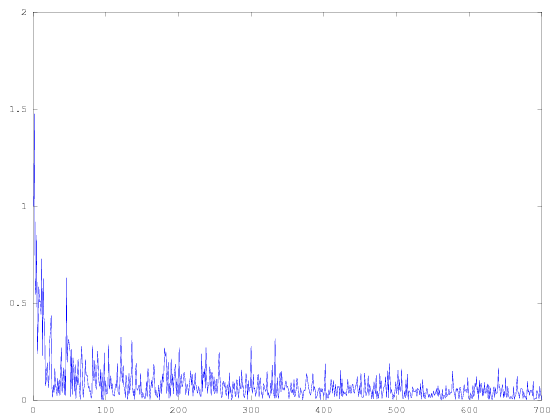

In [640]:
plot(res4, '-'); #Varianzfunktion 2

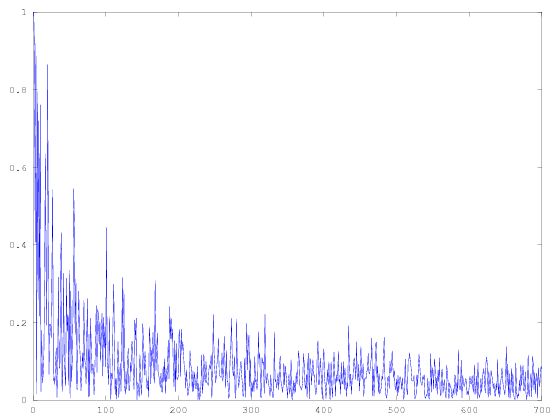

In [641]:
plot(res3, '-'); #Varianzfunktion 1

In [645]:
#ENDE AUFGABE 19 B)
#AUFGABE C:
#Der Grund fuer die Differenz bei den Ergebnissen liegt offenbar darin, dass in Fromel 1 viele Werte,
#die nahe bei 0 liegen subtrahiert, quadriert und dann summiert werden. Durch die Nähe zur 0 der Werte
#und damit die Nähe zur Maschinengenauigkeit (Maschinenepsilon) kann es leicht zu Ungenauigkeiten kommen,
#da a) bei sehr kleinen Werten der Computer entweder 0 nimmt statt dem Wert oder b) auf die nächste
#darstellbare Maschinenzahl gerundet werden muss.
#Bei Berechnungsvariante 2 ist das nicht der Fall: wir summieren und quadrieren "große" zahlen, bevor wir die Differenz
#Ergebnisse dieser Operationen bilden, die dann wieder in die gefährliche Nähe zur 0 kommen kann.

In [646]:
#BEGINN AUFGABE 20 A);

In [2]:
A = [1 1 1; #Sei A eine obere Dreiecksmatrix
     0 2 1; 
     0 0 3];
            
b = [3 3 3];

In [84]:
function resx = solveAx_b(A, b) #Matrix A, Vektor b, Lösung resx
    resx = zeros(1, size(b)(2));
    j = rows(A);
    while j >= 1
        if A(j,j) == 0
            return
        endif
        resx(j) = b(j)/A(j,j);
        for i = [1:j-1]
            b(i) = b(i) - A(i,j)*resx(j);
        endfor
        j = j - 1;
    endwhile
    return
endfunction

In [102]:
solveAx_b(A,b) #Loesung ist bestimmt korrekt - kann man im Kopf rechnen

ans =

   1   1   1



In [3]:
x = A/b

x =

   0.33333
   0.33333
   0.33333

